<center><h1><b><font size="6">Nobel Prize Analysis with Python</font></b></h1></center>

#### Packages

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

##### Load the data 

In [3]:
url = "https://raw.githubusercontent.com/Adrian-Cancino/DataScience/main/Data/nobel.csv"
data = pd.read_csv(url)
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


#### overview of the data set 

In [4]:
data.info()
#NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

#### NaN values

In [57]:
data.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                       0
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
usa_born_winner           0
decade                    0
female_winner             0
dtype: int64

In [59]:
data.dropna(axis=0, inplace=True)

In [61]:
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Female,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,True
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Female,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,True
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),...,Female,Munich University,Munich,Germany,1923-02-10,Munich,Germany,False,1900,True
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,...,Female,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,False,1900,True
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,...,Female,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,False,1900,True


### General knowledge of the set

#### Total registered awards?

In [62]:
display(len(data))

404

#### How many awards have been won by men and how many by women?

In [63]:
display(data['sex'].value_counts())

sex
Female    404
Name: count, dtype: int64

 #### Which countries have won the most awards?

In [64]:
display(data['birth_country'].value_counts().head(10))

birth_country
United States of America    121
United Kingdom               53
Germany                      36
France                       22
Sweden                       12
Netherlands                  11
Italy                         9
Austria                       9
Russia                        8
Canada                        8
Name: count, dtype: int64

#### Wich category has the most awards?

In [65]:
display(data['category'].value_counts().head(10))

category
Medicine     142
Physics      115
Chemistry    109
Economics     38
Name: count, dtype: int64

#### percentage of U.S. winners per decade?

In [66]:
# add new column = usa_born_winner
data['usa_born_winner'] = data['birth_country'] == "United States of America"
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Female,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,True
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Female,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,True
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),...,Female,Munich University,Munich,Germany,1923-02-10,Munich,Germany,False,1900,True
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,...,Female,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,False,1900,True
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,...,Female,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,False,1900,True


In [67]:
# add another column called = decade
# np.floor = rounded to the nearest whole number
data['decade'] = (np.floor(data['year'] / 10) *10).astype(int)
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Female,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,True
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Female,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,True
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),...,Female,Munich University,Munich,Germany,1923-02-10,Munich,Germany,False,1900,True
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,...,Female,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,False,1900,True
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,...,Female,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,False,1900,True


#### Group the data

In [68]:
prop_usa_winners = data.groupby('decade', as_index=False)['usa_born_winner'].mean()

In [69]:
prop_usa_winners
# usa accumulates more awards over time

,decade,usa_born_winner
0,1900,0.000000
1,1910,0.041667
2,1920,0.062500
3,1930,0.236842
4,1940,0.241379
5,1950,0.360000
6,1960,0.290909
7,1970,0.350877
8,1980,0.441860
9,1990,0.633333


#### Graphic the result

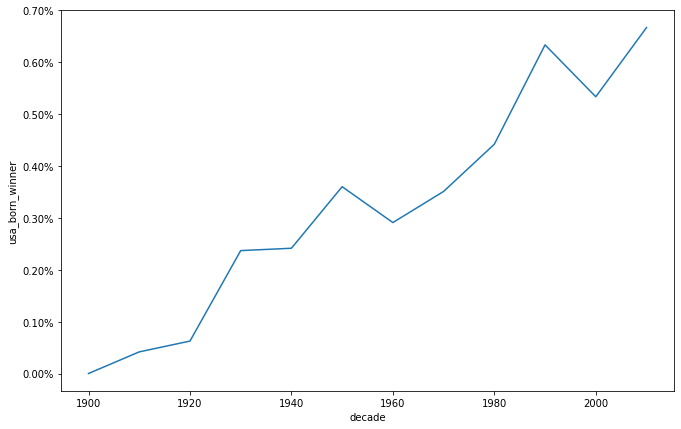

In [70]:
from matplotlib.ticker import PercentFormatter

plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)
ax.yaxis.set_major_formatter(PercentFormatter())

#### winning percentage between men and women in the different categories

In [71]:
data['female_winner'] = data['sex'] == "Female"
print(data.head())

   year   category                                           prize  \
0  1901  Chemistry               The Nobel Prize in Chemistry 1901   
2  1901   Medicine  The Nobel Prize in Physiology or Medicine 1901   
5  1901    Physics                 The Nobel Prize in Physics 1901   
6  1902  Chemistry               The Nobel Prize in Chemistry 1902   
8  1902   Medicine  The Nobel Prize in Physiology or Medicine 1902   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
2  "for his work on serum therapy, especially its...         1/1          293   
5  "in recognition of the extraordinary services ...         1/1            1   
6  "in recognition of the extraordinary services ...         1/1          161   
8  "for his work on malaria, by which he has show...         1/1          294   

  laureate_type                     full_name  birth_date          birth_city  \
0    Indivi

#### Group the data

#### the percentage / decade

In [72]:
prop_female_winners = data.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

In [73]:
prop_female_winners

,decade,category,female_winner
0,1900,Chemistry,1.0
1,1900,Medicine,1.0
2,1900,Physics,1.0
3,1910,Chemistry,1.0
4,1910,Medicine,1.0
5,1910,Physics,1.0
6,1920,Chemistry,1.0
7,1920,Medicine,1.0
8,1920,Physics,1.0
9,1930,Chemistry,1.0


In [74]:
print(data['female_winner'].unique())

[ True]


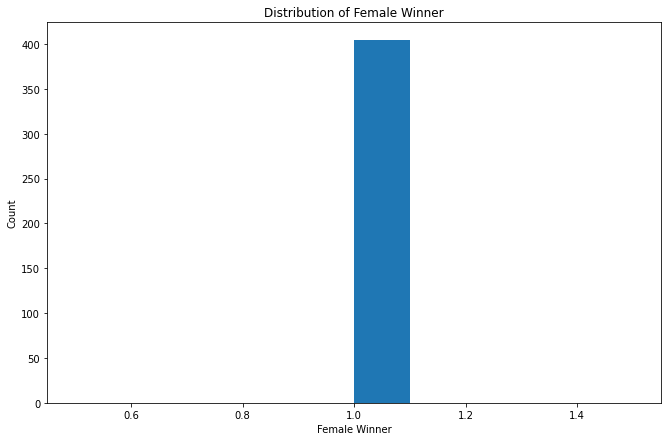

In [75]:
import matplotlib.pyplot as plt

plt.hist(data['female_winner'])
plt.xlabel('Female Winner')
plt.ylabel('Count')
plt.title('Distribution of Female Winner')
plt.show()

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

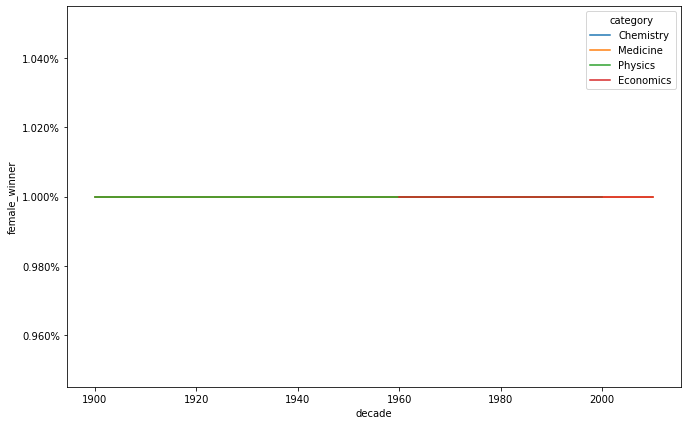

In [76]:
ax = sns.lineplot(x='decade',
                  y='female_winner', 
                  data=data, 
                  hue='category')

ax.yaxis.set_major_formatter(PercentFormatter())

#### winners by age

In [78]:
data['birth_date'] = pd.to_datetime(data['birth_date'])

data['age'] = data['year'] - data['birth_date'].dt.year

data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,True,49
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,True,47
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),...,Munich University,Munich,Germany,1923-02-10,Munich,Germany,False,1900,True,56
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,...,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,False,1900,True,50
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,...,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,False,1900,True,45


#### Graphic Result

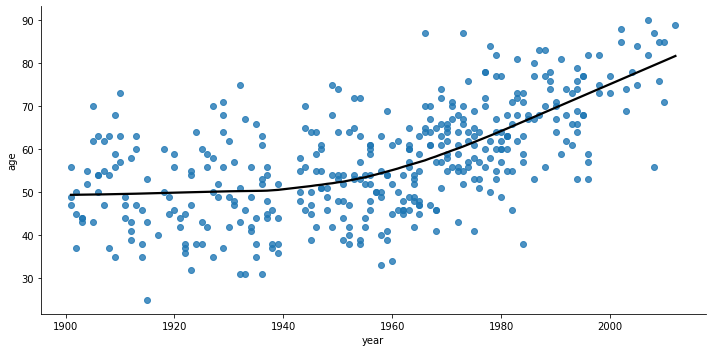

In [80]:
ax = sns.lmplot(x='year',
                  y='age', 
                  data=data, 
                  lowess=True,
                 aspect=2,
                 line_kws={'color': 'black'})

#### Age range of the winners in the different categories 

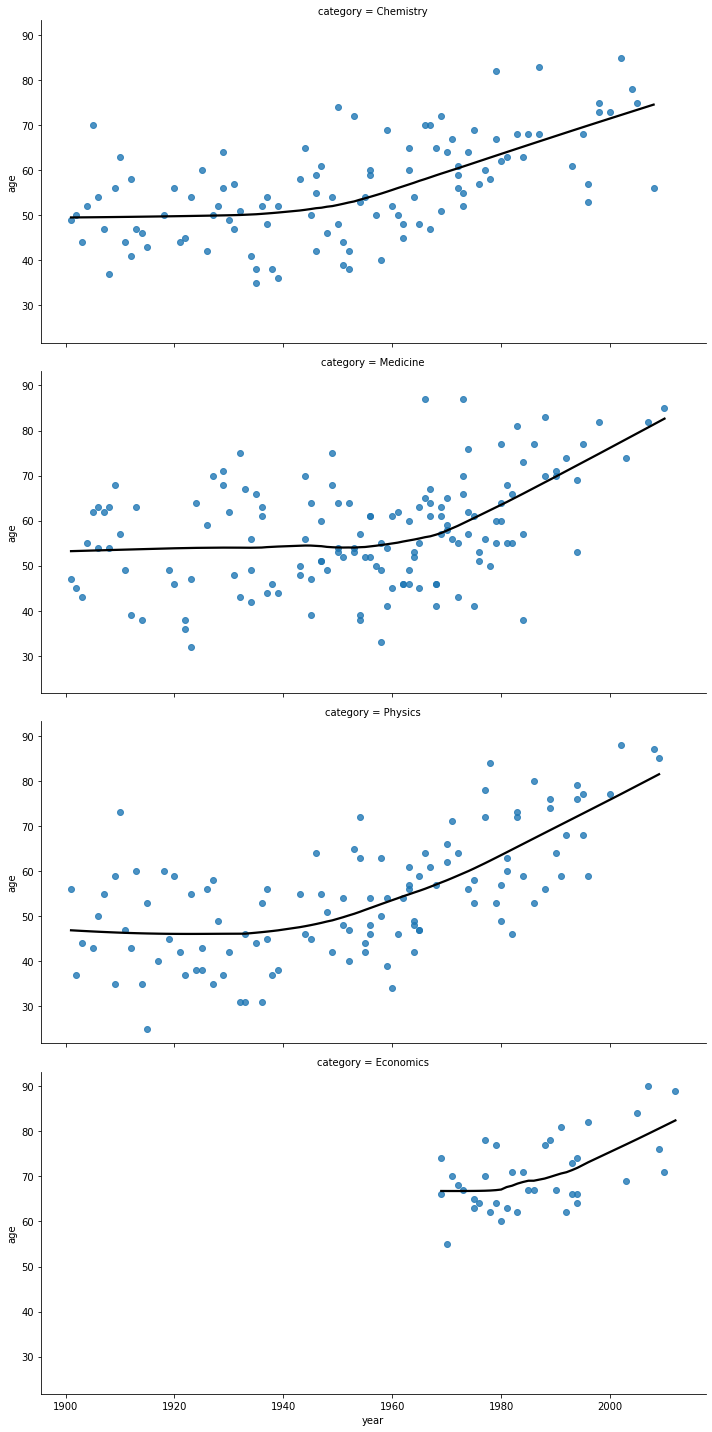

In [81]:
ax = sns.lmplot(x='year',
                  y='age', 
                  data=data, 
                  lowess=True,
                 aspect=2,
                 line_kws={'color': 'black'},
               	 row='category')

#### who is the oldest person to win the nobel prize and the youngest person to win the nobel prize

In [83]:
display(data.nlargest(1, 'age'))

data.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,True,90


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
85,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,21,Individual,William Lawrence Bragg,1890-03-31,Adelaide,...,Victoria University,Manchester,United Kingdom,1971-07-01,Ipswich,United Kingdom,False,1910,True,25
